In [78]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# TF1 Compatibility
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [79]:
tf.__version__

'2.0.0'

In [80]:
# to make this notebook's output stable across runs
np.random.seed(45)
tf.set_random_seed(45)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [81]:
import numpy as np

# Variable and Function Declaration
# pusat distribusi normal x dan y = 0
# standar deviasi x = 0.55
# standar deviasi y = 0.03
# banyak titik yang dibuat = 1000
# y = 0.1 * x + 0.3 + nilai acak dgn distribusi normal 0 dan memiliki standar dev 0.03

n = 1000
x = np.random.normal(0, 0.55, n)
yr = np.random.normal(0, 0.03, n)
y = 0.1 * x + 0.3 + yr

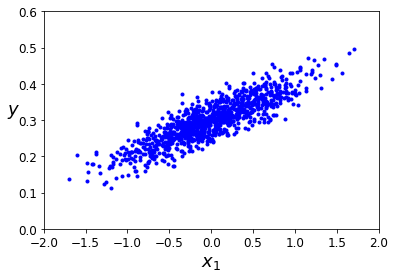

In [82]:
#plotting the function
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-2, 2, 0, 0.6])
plt.show()

In [83]:
# Regression Preparation
X_new = np.array([[-2], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Adding x0 = 1 to each instance

In [84]:
# TF Variable Placeholder
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [85]:
# Gradient and Bias Randomly Declared
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b")

In [90]:
# TF Settings
learning_rate = 0.5  # The learning Rate
training_epochs = 8 # The number of iterations to perform gradient descent

In [91]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

In [92]:
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 

Epoch 1 :  W = -1.4357047 ; b = -0.09200285
Epoch 2 :  W = -1.2263384 ; b = 0.05290159
Epoch 3 :  W = -1.0450209 ; b = 0.14207067
Epoch 4 :  W = -0.88820666 ; b = 0.19726564
Epoch 5 :  W = -0.75271577 ; b = 0.23170581
Epoch 6 :  W = -0.63572896 ; b = 0.25342754
Epoch 7 :  W = -0.5347653 ; b = 0.26732266
Epoch 8 :  W = -0.44766018 ; b = 0.2763713


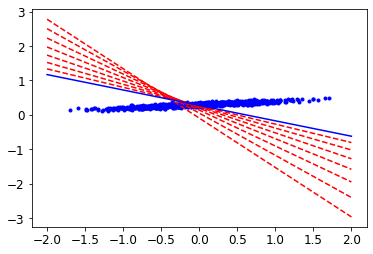

In [93]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
    
    # Plotting the original function graph
    plt.plot(x, y, "b.")
    
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every epoch
        print("Epoch", (epoch + 1), ": ", "W =", sess.run(W), "; b =", sess.run(b)) 
        
        # Plotting the prediction graph
        y_pred = sess.run(W) * X_new_b + sess.run(b)
        style = "r--" if (epoch+1) < training_epochs else "b-"
        plt.plot(X_new_b, y_pred, style)